In [1]:
import pandas as pd
import sys
import warnings
warnings.filterwarnings("ignore")

sys.path.append('./eval-algos/S7/models/')

from utils.allocator import AllocationConfig, allocate_with_constraints

In [2]:
## Onchain Builders

In [3]:
from onchain_builders import OnchainBuildersCalculator, SimulationConfig, load_config, load_data

ds, sim_cfg = load_config('eval-algos/S7/weights/onchain_builders_testing.yaml')
df_data = load_data(ds)

display_name
Uniswap               0.151791
Aerodrome Finance     0.132189
Virtuals Protocol     0.100445
Zora                  0.036450
Layer3                0.035381
Reservoir Protocol    0.034263
LI.FI                 0.026413
Safe                  0.022043
Metamask              0.021982
0x                    0.018815
Across                0.018737
1Inch                 0.017837
Optimism              0.016701
PancakeSwap           0.016421
KyberSwap             0.015290
Name: weighted_score, dtype: float64


<Axes: >

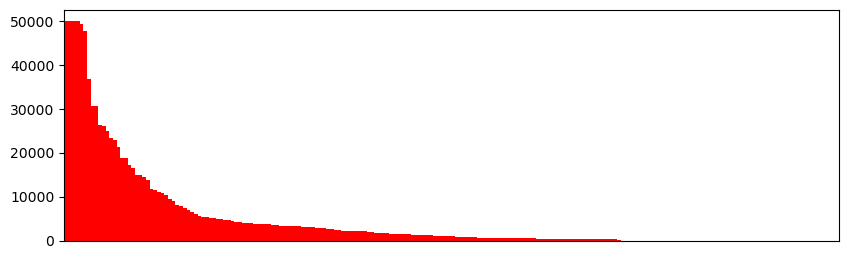

In [4]:
alloc = AllocationConfig(budget=1_000_000, min_amount_per_project=200, max_share_per_project=0.05)
sim_cfg.metric_variants.update({'Adoption': 1.0, 'Growth': 0, 'Retention': 0})
calculator = OnchainBuildersCalculator(sim_cfg)
analysis = calculator.run_analysis(df_data)

scores = analysis['final_results']['weighted_score'].reset_index().set_index('display_name')['weighted_score']
print(scores.head(15))

rewards = allocate_with_constraints(scores, alloc, print_results=False)
rewards.sort_values(ascending=False).plot(kind='bar', xticks=[], xlabel='', color='red', width=1, figsize=(10,3))

display_name
Zora                  0.069887
Reservoir Protocol    0.067036
Uniswap               0.059612
Layer3                0.048629
Safe                  0.043477
LI.FI                 0.042446
Aerodrome Finance     0.040610
Across                0.033773
Virtuals Protocol     0.029287
PancakeSwap           0.028053
KyberSwap             0.024031
LayerZero             0.021706
Optimism              0.021353
Sushi                 0.020359
BaseSwap              0.020343
Name: weighted_score, dtype: float64


<Axes: >

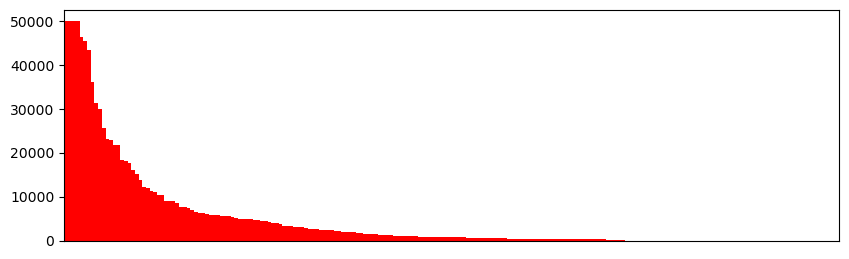

In [5]:
alloc = AllocationConfig(budget=1_000_000, min_amount_per_project=200, max_share_per_project=0.05)
sim_cfg.metric_variants.update({'Adoption': 0.0, 'Growth': 0, 'Retention': 1.0})
sim_cfg.metrics.update({'monthly_active_farcaster_users': 1.0})

calculator = OnchainBuildersCalculator(sim_cfg)
analysis = calculator.run_analysis(df_data)

scores = analysis['final_results']['weighted_score'].reset_index().set_index('display_name')['weighted_score']
print(scores.head(15))

rewards = allocate_with_constraints(scores, alloc, print_results=False)
rewards.sort_values(ascending=False).plot(kind='bar', xticks=[], xlabel='', color='red', width=1, figsize=(10,3))

In [6]:
## Devtooling

In [7]:
from devtooling_openrank import DevtoolingCalculator, SimulationConfig, load_config, load_data

ds, sim_cfg = load_config('eval-algos/S7/weights/devtooling_openrank_testing.yaml')
data = load_data(ds)

sim_cfg.time_decay.update(
    {
        'event_to_devtooling_repo': 0.5,
        'commit_to_onchain_repo': 0.5
    }
)
calculator = DevtoolingCalculator(sim_cfg)
analysis = calculator.run_analysis(*data)

scores = (
    analysis['devtooling_project_results']
    .set_index('display_name')
    ['v_aggregated']
    .sort_values(ascending=False)
)
scores = scores[scores>0]
scores.head(15)

INFO:root:eigentrust compute took 1.4015702500473708 secs 


display_name
wevm                    0.093369
Foundry                 0.061428
DefiLlama               0.060903
Optimism                0.057651
ethers.js               0.054731
OpenZeppelin            0.053194
Rainbow                 0.032969
Hardhat                 0.028005
Snapshot                0.027324
Ethereum Cat Herders    0.025129
EthereumJS              0.022084
Sushi                   0.021094
Solidity                0.018739
Buidl Guidl             0.017877
geth                    0.016579
Name: v_aggregated, dtype: float64

<Axes: >

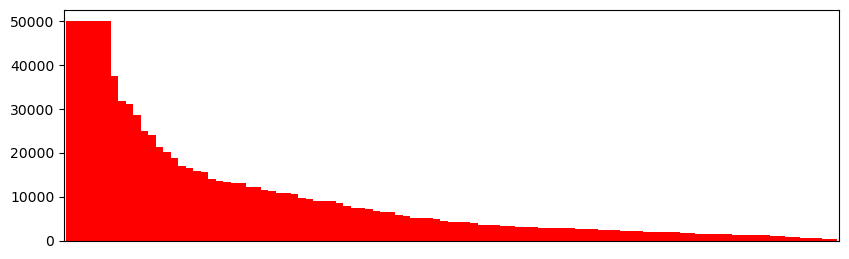

In [8]:
rewards = allocate_with_constraints(scores, alloc, print_results=False)
rewards.sort_values(ascending=False).plot(kind='bar', xticks=[], xlabel='', color='red', width=1, figsize=(10,3))